# Imports

In [1]:
import pandas as pd
import numpy as np
from vpython import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>

# Extracting Data From Files

In this section, we will extract data from files and store them in pandas Dataframes.

In [2]:
filenames = ["100_1.a", "250_1.a"]

df = {} # dictionary for storing the dataframes

for file in filenames:
       
    data = {
        "t": [],
        "x": [],
        "y": [],
        "z": [],
        "u(p)": [],
        "0.0": [],
        "0.00": [],
        "fN-used": []
    }
     
    f = open("optimisation/"+file, "r")
    headerLen = 10
    for l, line in enumerate(f):        
            if l >= headerLen:         
                part = line.split()
                data["t"].append(float(part[0]))
                data["x"].append(float(part[1]))
                data["y"].append(float(part[2]))
                data["z"].append(float(part[3]))
                data["u(p)"].append(float(part[4]))
                data["0.0"].append(float(part[5]))
                data["0.00"].append(float(part[6]))
                data["fN-used"].append(float(part[7]))

    for d in data:
        data[d] = np.array(data[d])
        
    temp = pd.DataFrame(data)
    df[file] = temp     
    print(file[:-2], "\n", temp, "\n")



100_1 
               t    x     y     z  u(p)  0.0  0.00  fN-used
0           5.6 -2.6  90.3  27.9   0.1  0.0   0.0      5.0
1           8.2 -2.6  87.5  28.4   0.4  0.0   0.0      5.0
2          12.0 -6.3  89.5  27.9   0.3  0.0   0.0      5.0
3          13.8 -2.4  87.6  26.7   0.3  0.0   0.0      5.0
4          17.0 -2.0  88.3  29.2   0.3  0.0   0.0      5.0
...         ...  ...   ...   ...   ...  ...   ...      ...
92396  299964.2 -5.4  89.9  27.6   0.3  0.0   0.0      5.0
92397  299967.2 -6.6  90.5  28.6   0.5  0.0   0.0      5.0
92398  299970.4 -4.8  91.0  29.3   0.2  0.0   0.0      5.0
92399  299974.0 -0.1  88.6  27.7   0.1  0.0   0.0      5.0
92400  299976.8 -3.7  89.6  28.8   0.3  0.0   0.0      5.0

[92401 rows x 8 columns] 

250_1 
               t    x     y     z  u(p)  0.0  0.00  fN-used
0          13.1 -2.8  87.8  26.6   0.3  0.0   0.0      7.0
1          22.3 -3.7  89.5  27.9   0.3  0.0   0.0      7.0
2          31.7 -1.8  89.5  29.1   0.2  0.0   0.0      7.0
3          3

# Plotting the Cartesian Coordinates

In this section, we plot the data obtained from each file in 3d coordinate system, assuming the axes are in the right order. 

The plotted data shows the flow pattern, which can provide some clues about the location of the axis of rotation

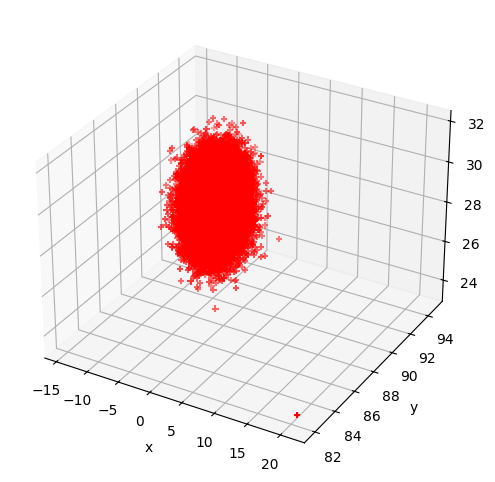

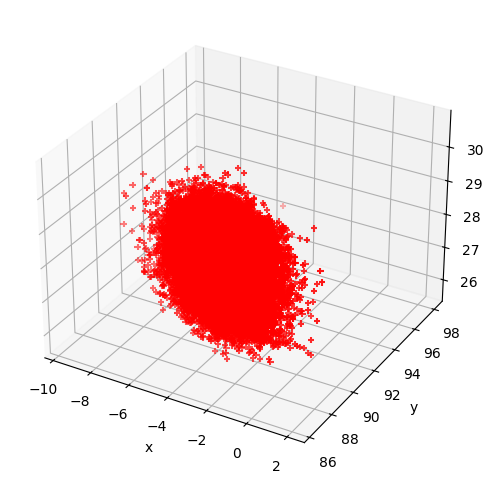

In [3]:

#data = df["CPbr.a"]
for d in df.values():
    x_data = d["x"]
    y_data = d["y"]
    z_data = d["z"]

    # Create a figure and a 3D axis
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Create a 3D scatter plot
    ax.scatter(x_data, y_data, z_data, c='r', marker='+')

    # Set labels for the axes
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    # Show the plot
    plt.show()


# Optimization

In [4]:

std_3d = {}

for key, value in df.items():
    std = np.sqrt((1/len(value["x"]))*sum(np.power(value["x"]-np.mean(value["x"]),2)
            +np.power(value["y"]-np.mean(value["y"]),2)
            + np.power(value["z"]-np.mean(value["z"]),2)))
    
    std_3d[key] = std
    print(key, std, sep="\n")

100_1.a
2.2389389977056364
250_1.a
1.7057769923142994


# Converting from cartesian to cylindrical coordinates

In [5]:
rotation_axis = [0,0,0]         # assuming axis of rotation is found to be at the origin
cyli_coordinates = {}

for key, value in df.items():
    temp = {}    
    r_distance = np.sqrt(np.power(value["x"] - rotation_axis[0], 2) 
                + np.power(value["y"] - rotation_axis[1], 2))
    theta = np.arctan2(value["y"] - rotation_axis[1], value["x"] - rotation_axis[0])

    temp["r"] = r_distance
    temp["theta"] = theta
    temp["z"] = value["z"]
    cyli_coordinates[key] = pd.DataFrame(temp)
    
    print(key[:-2], "\n", pd.DataFrame(temp), "\n")

100_1 
                r     theta     z
0      90.337423  1.599581  27.9
1      87.538620  1.600502  28.4
2      89.721458  1.641071  27.9
3      87.632871  1.598187  26.7
4      88.322647  1.593443  29.2
...          ...       ...   ...
92396  90.062034  1.630791  27.6
92397  90.740344  1.643596  28.6
92398  91.126505  1.623495  29.3
92399  88.600056  1.571925  27.7
92400  89.676363  1.612068  28.8

[92401 rows x 3 columns] 

250_1 
                r     theta     z
0      87.844636  1.602676  26.6
1      89.576448  1.612114  27.9
2      89.518099  1.590905  29.1
3      89.824551  1.594177  28.4
4      89.968105  1.609709  27.6
...          ...       ...   ...
35652  88.754155  1.605731  28.4
35653  89.760682  1.607569  28.1
35654  89.024772  1.594387  28.7
35655  90.361496  1.630592  27.7
35656  90.987966  1.614772  29.2

[35657 rows x 3 columns] 



# Plotting the Cylindrical Coordinates

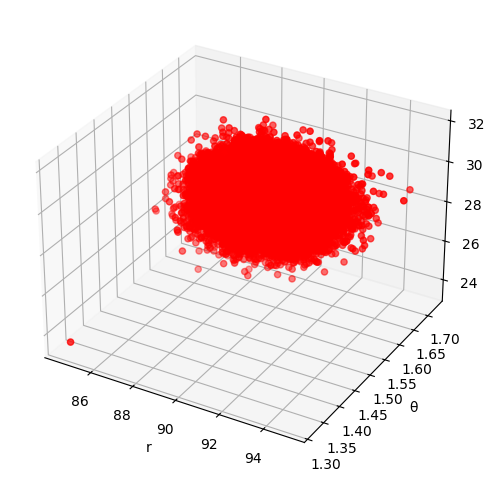

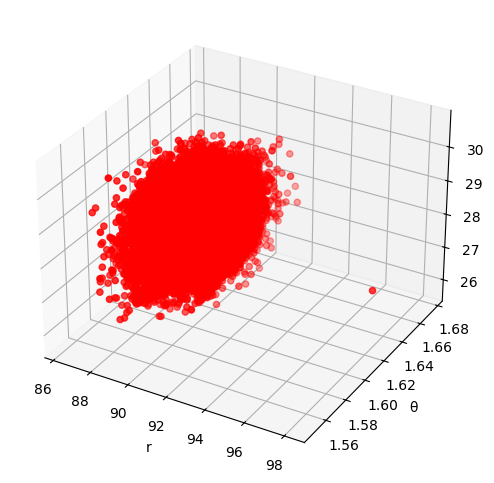

In [6]:
for d in cyli_coordinates.values():
    x_data = d["r"]
    y_data = d["theta"]
    z_data = d["z"]

    # Create a figure and a 3D axis
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Create a 3D scatter plot
    ax.scatter(x_data, y_data, z_data, c='r', marker='o')

    # Set labels for the axes
    ax.set_xlabel('r')
    ax.set_ylabel('θ')
    ax.set_zlabel('z')

    # Show the plot
    plt.show()